Linear Regression Assignment

In [40]:
## Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [41]:
## import model related libraries

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from math import pi

In [42]:

# RMSLE function definition
#RMSLE = sqrt( (1/n) * Σ (log(pred+1) - log(actual+1))² ) 

def rmsle(y_true, y_pred):
    y_pred = np.where(y_pred<0, 0, y_pred)
    return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))

In [43]:
# importing data to dataframe using pandas  
train = pd.read_csv("bike_train.csv")
test = pd.read_csv("bike_test.csv")

In [44]:
# Display the shape of the dataset
print(train.shape)

(10450, 12)


In [45]:
# Display the first 5 rows of the training dataset
train.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,15/7/12 7:00,3,0,0,1,28.70000,33.335000,79,6.003200,17,30,47
1,14/8/12 15:00,3,0,1,1,33.62000,37.880000,46,15.001300,84,199,283
2,6/2/11 6:00,1,0,0,1,10.66000,12.880000,60,15.001300,0,1,1
3,6/5/12 17:00,2,0,0,2,26.42506,30.566166,61,9.512288,198,330,531
4,9/1/12 2:00,1,0,1,1,9.84000,12.120000,56,8.998100,2,3,5


In [46]:
print (train.info()) #2.4 Summary of  Training data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10450 entries, 0 to 10449
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10450 non-null  object 
 1   season      10450 non-null  int64  
 2   holiday     10450 non-null  int64  
 3   workingday  10450 non-null  int64  
 4   weather     10450 non-null  int64  
 5   temp        10450 non-null  float64
 6   atemp       10450 non-null  float64
 7   humidity    10450 non-null  int64  
 8   windspeed   10450 non-null  float64
 9   casual      10450 non-null  int64  
 10  registered  10450 non-null  int64  
 11  count       10450 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 979.8+ KB
None


In [47]:
print (train.describe()) #2.5 Statistical Summary of all numerical attributes

             season       holiday    workingday       weather          temp  \
count  10450.000000  10450.000000  10450.000000  10450.000000  10450.000000   
mean       2.507943      0.028804      0.675694      1.413876     20.191700   
std        1.116946      0.167263      0.468137      0.632258      7.792683   
min        1.000000      0.000000      0.000000      1.000000      0.820000   
25%        2.000000      0.000000      0.000000      1.000000     13.940000   
50%        3.000000      0.000000      1.000000      1.000000     20.500000   
75%        4.000000      0.000000      1.000000      2.000000     26.240000   
max        4.000000      1.000000      1.000000      4.000000     41.000000   

              atemp      humidity     windspeed        casual    registered  \
count  10450.000000  10450.000000  10450.000000  10450.000000  10450.000000   
mean      23.605793     61.924211     12.765259     35.869091    154.511675   
std        8.478045     19.245193      8.102821    

Q1. Examine dataset size, missing values, and feature types. 
answer : no missing value ,  categorical feature are season, holiday, workingday, weather & continuous variable are temp, atemp, humidity, windspeed
Q2. Visualize relationships between key features and the target variable (count).

Q3: Suggest which variables are likely to be most informative.
Holidays and working day plays important in categorical data
 

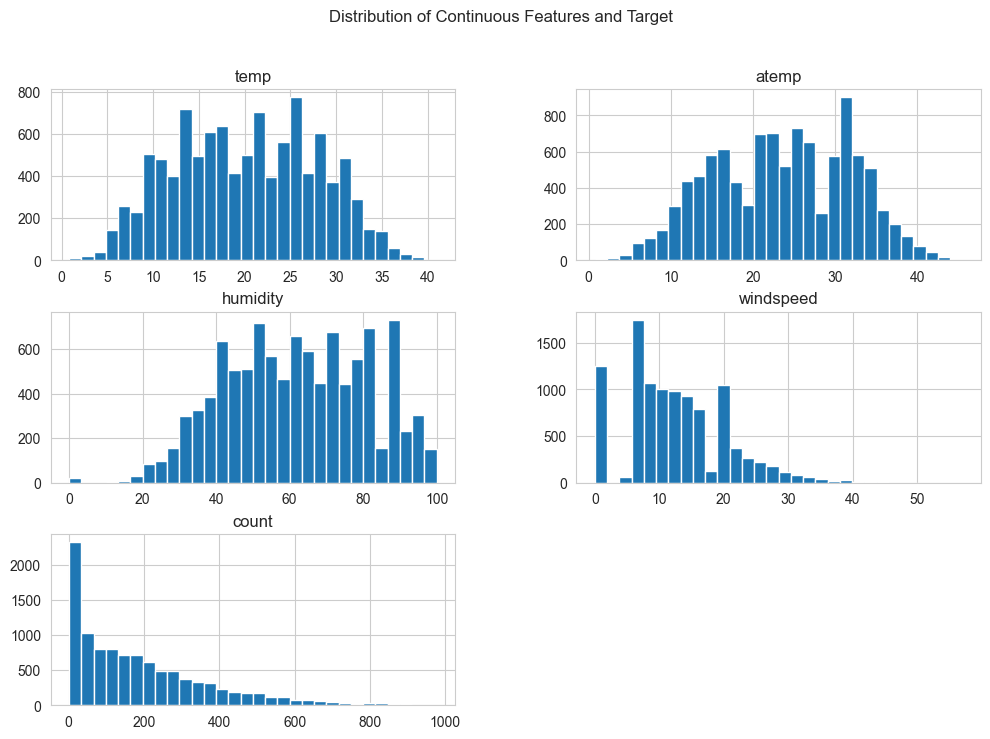

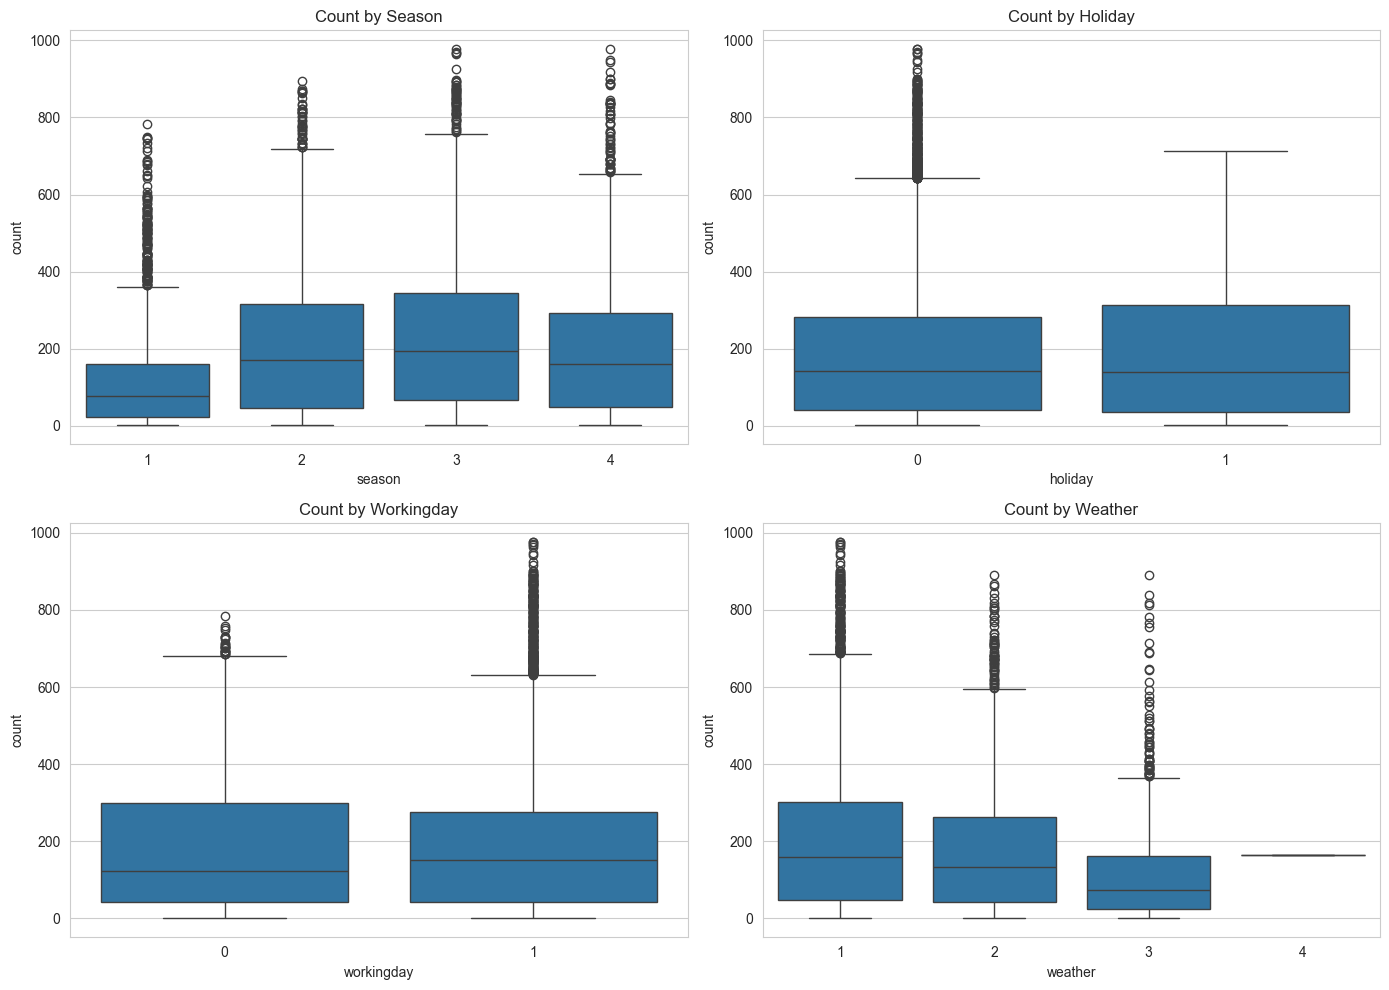

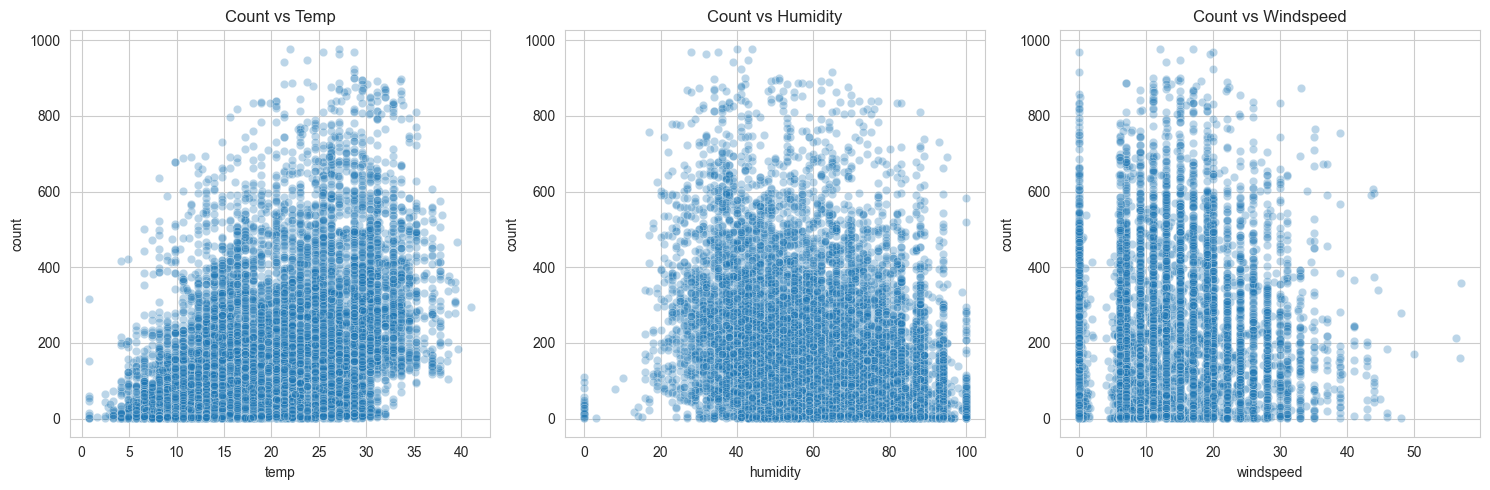

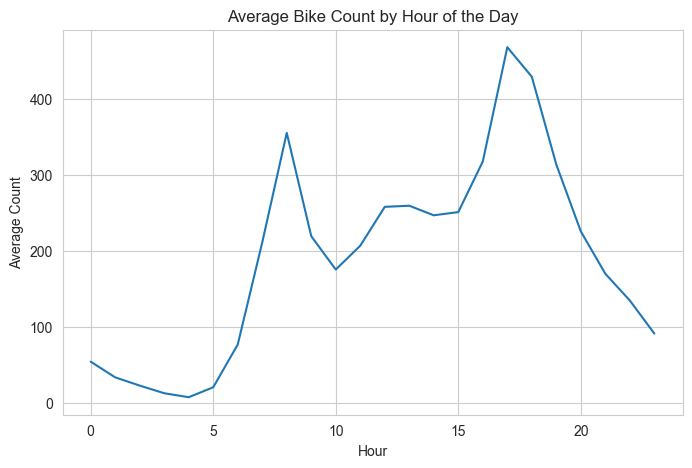

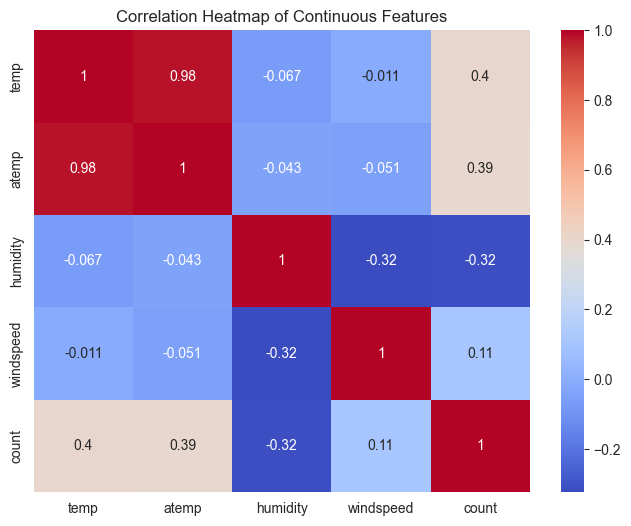

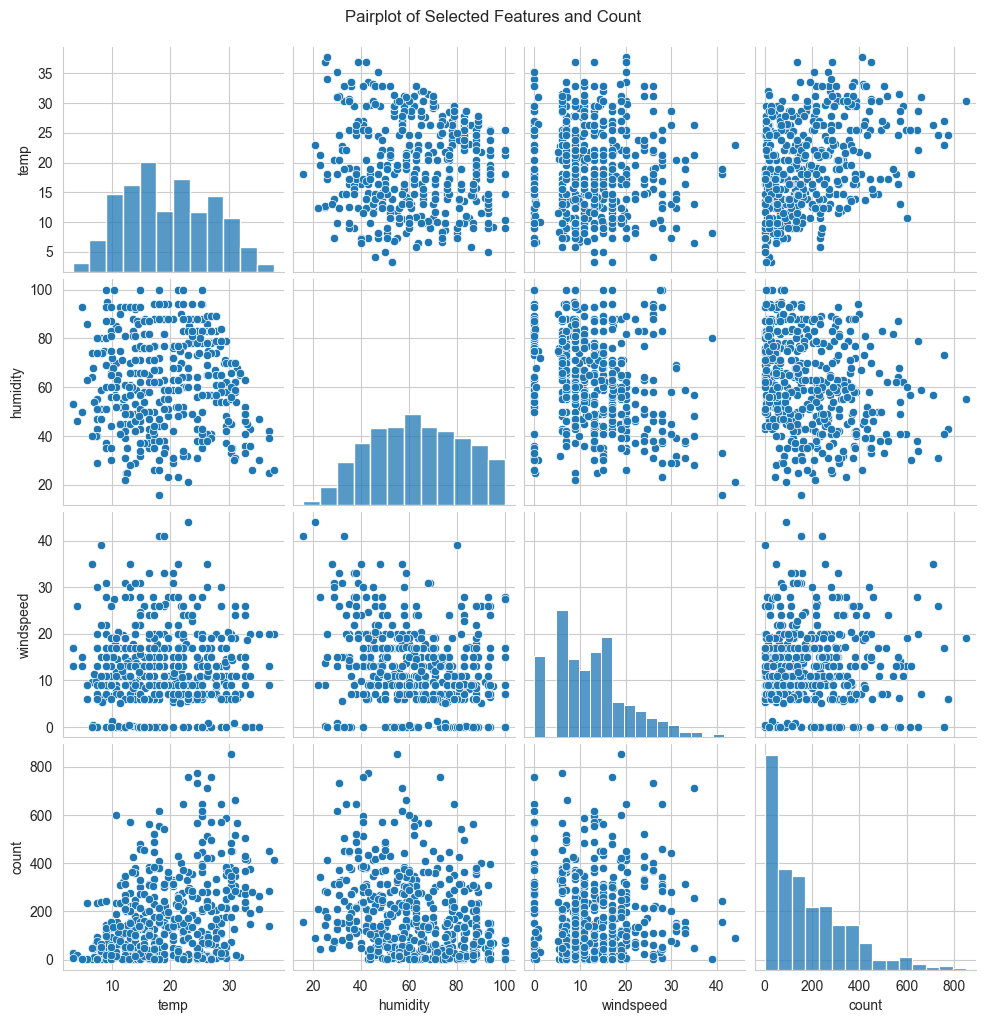

In [48]:
#visualization of data is kept standlone for better readability
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
train_df = pd.read_csv('bike_train.csv')

# Convert datetime column to datetime type and extract hour and month for temporal analysis
train_df['datetime'] = pd.to_datetime(train_df['datetime'], format='%d/%m/%y %H:%M')
train_df['hour'] = train_df['datetime'].dt.hour
train_df['month'] = train_df['datetime'].dt.month

# Set plotting style
sns.set_style('whitegrid')

# 1. Histograms for continuous features and target
continuous_features = ['temp', 'atemp', 'humidity', 'windspeed', 'count']
train_df[continuous_features].hist(bins=30, figsize=(12, 8))
plt.suptitle('Distribution of Continuous Features and Target')
plt.show()

# 2. Boxplots of count by categorical features
categorical_features = ['season', 'holiday', 'workingday', 'weather']
plt.figure(figsize=(14, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=feature, y='count', data=train_df)
    plt.title(f'Count by {feature.capitalize()}')
plt.tight_layout()
plt.show()

# 3. Scatter plots for continuous features vs count
plt.figure(figsize=(15, 5))
for i, feature in enumerate(['temp', 'humidity', 'windspeed'], 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=feature, y='count', data=train_df, alpha=0.3)
    plt.title(f'Count vs {feature.capitalize()}')
plt.tight_layout()
plt.show()

# 4. Line plot for average count by hour of the day
plt.figure(figsize=(8, 5))
hourly_counts = train_df.groupby('hour')['count'].mean()
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values)
plt.title('Average Bike Count by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Average Count')
plt.show()

# 5. Correlation heatmap for continuous variables
plt.figure(figsize=(8, 6))
corr = train_df[continuous_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Continuous Features')
plt.show()

# 6. Pairplot of key features and count (sample for speed)
sns.pairplot(train_df.sample(500), vars=['temp', 'humidity', 'windspeed', 'count'])
plt.suptitle('Pairplot of Selected Features and Count', y=1.02)
plt.show()


In [49]:
# Your dataset uses DD/MM/YY HH:MM format, so dayfirst=True is appropriate
train['datetime_parsed'] = pd.to_datetime(
    train['datetime'], 
    dayfirst=True, 
    errors='coerce'
)

test['datetime_parsed'] = pd.to_datetime(
    test['datetime'], 
    dayfirst=True, 
    errors='coerce'
)
#  Extract datetime features
def add_datetime_features(df):
    # Basic time units
    df['hour'] = df['datetime_parsed'].dt.hour
    df['day'] = df['datetime_parsed'].dt.day
    df['month'] = df['datetime_parsed'].dt.month
    df['year'] = df['datetime_parsed'].dt.year
    
    # Monday = 0 ... Sunday = 6
    df['weekday'] = df['datetime_parsed'].dt.weekday
    
    # Weekend flag
    df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)
    
    return df


# Apply for both train and test
train = add_datetime_features(train)
test = add_datetime_features(test)

/var/folders/pd/sd9vp0w55wggcsgz81smzt6c0000gn/T/ipykernel_18112/797214074.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['datetime_parsed'] = pd.to_datetime(


In [50]:
def add_interaction_features(df):
    df["temp_feels_diff"] = df["temp"] - df["atemp"]
    df["bad_weather_peak"] = df["weather"] * df["hour"]
    df["humid_temp"] = df["humidity"] * df["temp"]
    df["work_hour"] = df["workingday"] * df["hour"]
    df["is_weekend"] = (df["weekday"] >= 5).astype(int)
    df["weekend_hour"] = df["is_weekend"] * df["hour"]
    df["wind_weather"] = df["windspeed"] * df["weather"]
    df["temp_hour"] = df["temp"] * df["hour"]
    df["peak_morning"] = df["hour"].isin([7,8,9]).astype(int)
    df["peak_evening"] = df["hour"].isin([17,18,19]).astype(int)
    return df
train = add_interaction_features(train)
test = add_interaction_features(test)

In [51]:
#  causal and registered columns are not present in test set, so drop them from train set , also target is to get predicated count , 
# hence dropping these columns will avoid data leakage  
for c in ['casual','registered']:
    if c in train.columns:
        train = train.drop(columns=[c])

In [52]:

#  Target & base features
y = train['count']
X = train.drop(columns=['count','datetime'])


In [53]:

# Cyclical encoding of time features
def cyclical_encode(series, period, prefix):
    radians = 2 * np.pi * series / period
    return pd.DataFrame({
        f'{prefix}_sin': np.sin(radians),
        f'{prefix}_cos': np.cos(radians)
    })

# Apply cyclical enc
X_cyc = pd.concat([
    cyclical_encode(X['hour'], 24, 'hour'),
    cyclical_encode(X['month'], 12, 'month'),
    cyclical_encode(X['weekday'], 7, 'weekday')], axis=1)

X_model_fe = X.drop(columns=['hour','day','month','weekday']).reset_index(drop=True)
X_model_fe = pd.concat([X_model_fe, X_cyc.reset_index(drop=True)], axis=1)

# same for test
test_model = test.drop(columns=['datetime']).copy()
test_cyc = pd.concat([
    cyclical_encode(test_model['hour'], 24, 'hour'),
    cyclical_encode(test_model['month'], 12, 'month'),
    cyclical_encode(test_model['weekday'], 7, 'weekday')], axis=1)
test_model = test_model.drop(columns=['hour','day','month','weekday']).reset_index(drop=True)
test_model = pd.concat([test_model, test_cyc.reset_index(drop=True)], axis=1)

In [54]:
# model feature columns
numeric_cols = ['temp','atemp','humidity','windspeed','year','day']
cyc_cols = ['hour_sin','hour_cos','month_sin','month_cos','weekday_sin','weekday_cos']
cat_cols = ['season','weather','holiday','workingday','is_weekend']

In [55]:

# Ensure expected columns exist
for col in numeric_cols + cyc_cols + cat_cols:
    if col not in X_model_fe.columns:
        if col in cyc_cols: X_model_fe[col] = 0.0
        elif col in numeric_cols: X_model_fe[col] = X_model_fe[col] if col in X_model_fe.columns else 0.0
        else: X_model_fe[col] = 0
    if col not in test_model.columns:
        test_model[col] = 0

In [56]:
# Preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
categorical_transformer = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols + cyc_cols),
    ('cat', categorical_transformer, cat_cols)
], remainder='drop')

In [57]:
# Split the data into training and validation sets
#randoem_state=42 for reproducibility
#test_size=0.2 means 20% data will be used for validation
#Q5. Split data into training and validation sets and build a simple Linear Regression model.
X_train, X_val, y_train, y_val = train_test_split(X_model_fe, y, test_size=0.2, random_state=42)

assert not np.any(np.isnan(X_train))
assert not np.any(np.isinf(X_train))

In [58]:
#liner regression , ridge regression , random forest and gradient boosting models
#Q6. To improve model performance, you may try to different models and tune hyperparameters.:

models = {
    'Linear': Pipeline([('pre', preprocessor), ('model', LinearRegression())]),
    'Ridge': Pipeline([('pre', preprocessor), ('model', RidgeCV(alphas=[0.1,1.0,10.0]))]),
    'Polynomial Regression (Degree 2)': Pipeline([
        ('pre', preprocessor),
        ('poly', PolynomialFeatures(degree=3, include_bias=False)),
        ('scaler', StandardScaler()),  # Added scaler here
        ('model', LinearRegression())
    ]),
    'Lasso Polynomial Regression': Pipeline([
        ('pre', preprocessor),
        ('poly', PolynomialFeatures(degree=3, include_bias=False)),
        ('scaler', StandardScaler()),  # Added scaler here
        ('model', Lasso(alpha=0.001, max_iter=10000))  # Increased max_iter
    ]),
    'RandomForest': Pipeline([('pre', preprocessor), ('model', RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1))]),
    'GradientBoosting': Pipeline([('pre', preprocessor), ('model', GradientBoostingRegressor(n_estimators=200, random_state=42))])
}

In [59]:
#Q7. Summarize all results (of different models tried out) in one table (RMSLE, key observations).
for name, pipe in models.items():
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_val)
    print(name, "RMSLE:", rmsle(y_val, preds))

/Users/ps/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ps/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ps/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ps/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/ps/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ps/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/ps/Library/Python

Linear RMSLE: 1.1165181788064331
Ridge RMSLE: 1.1148163207128778


/Users/ps/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:311: RuntimeWarning: divide by zero encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/Users/ps/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:311: RuntimeWarning: overflow encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/Users/ps/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:311: RuntimeWarning: invalid value encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/Users/ps/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ps/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ps/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarn

Polynomial Regression (Degree 2) RMSLE: 1.034788143483018


/Users/ps/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.281e+07, tolerance: 2.739e+04
  model = cd_fast.enet_coordinate_descent(
/Users/ps/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:311: RuntimeWarning: divide by zero encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/Users/ps/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:311: RuntimeWarning: overflow encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/Users/ps/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:311: RuntimeWarning: invalid value encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/Users/ps/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: 

Lasso Polynomial Regression RMSLE: 1.0324235362179623
RandomForest RMSLE: 0.39486902264364815
GradientBoosting RMSLE: 0.8385488374345741


In [60]:
# fine tuning: Import for log transform and hyperparameter tuning
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

#  fine tuning: RMSLE function if not already defined
def rmsle(y_true, y_pred):
    y_pred = np.where(y_pred < 0, 0, y_pred)  # avoid negative predictions
    return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true)) ** 2))

#  fine tuning: Wrap your existing GradientBoosting pipeline with log-transform target
regressor_log = TransformedTargetRegressor(
    regressor=Pipeline([
        ('pre', preprocessor),
        ('model', GradientBoostingRegressor(random_state=42))
    ]),
    func=np.log1p,
    inverse_func=np.expm1
)

#  fine tuning: Hyperparameter tuning grid
param_grid = {
    'regressor__model__n_estimators': [100, 200, 300],
    'regressor__model__max_depth': [3, 4, 5],
    'regressor__model__learning_rate': [0.01, 0.1, 0.2],
    'regressor__model__min_samples_split': [2, 5, 10]
}

#  fine tuning: Run GridSearchCV to find best hyperparameters
grid_search = GridSearchCV(
    regressor_log,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_log_error',
    n_jobs=-1,
    verbose=2
)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_

#  fine tuning: Predict and evaluate RMSLE on validation set
y_pred_val = best_model.predict(X_val)
print(f"Validation RMSLE after tuning: {rmsle(y_val, y_pred_val)}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END regressor__model__learning_rate=0.01, regressor__model__max_depth=3, regressor__model__min_samples_split=2, regressor__model__n_estimators=100; total time=   0.8s
[CV] END regressor__model__learning_rate=0.01, regressor__model__max_depth=3, regressor__model__min_samples_split=2, regressor__model__n_estimators=100; total time=   0.8s
[CV] END regressor__model__learning_rate=0.01, regressor__model__max_depth=3, regressor__model__min_samples_split=2, regressor__model__n_estimators=100; total time=   0.8s
[CV] END regressor__model__learning_rate=0.01, regressor__model__max_depth=3, regressor__model__min_samples_split=2, regressor__model__n_estimators=100; total time=   0.8s
[CV] END regressor__model__learning_rate=0.01, regressor__model__max_depth=3, regressor__model__min_samples_split=2, regressor__model__n_estimators=100; total time=   0.8s
[CV] END regressor__model__learning_rate=0.01, regressor__model__max_depth=3, 

In [61]:
#based on 
final_pipe = Pipeline([('pre', preprocessor), ('model', best_model(n_estimators=200, random_state=42, n_jobs=-1))])
final_pipe.fit(X_model_fe, y)
test_preds = final_pipe.predict(test_model[numeric_cols + cyc_cols + cat_cols])
test_preds = np.where(test_preds < 0, 0, test_preds)
test_preds_rounded = np.round(test_preds).astype(int)

TypeError: 'TransformedTargetRegressor' object is not callable

In [63]:
results = {}
for name, pipe in models.items():
    if name == 'GradientBoosting (Tuned Log-Transform)':
        # Use already tuned model
        y_pred = best_gb_model.predict(X_val)
    else:
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_val)
    score = rmsle(y_val, y_pred)
    print(f"{name} RMSLE: {score}")
    results[name] = score

/Users/ps/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ps/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ps/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ps/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/ps/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ps/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/ps/Library/Python

Linear RMSLE: 1.1165181788064331
Ridge RMSLE: 1.1148163207128778


/Users/ps/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:311: RuntimeWarning: divide by zero encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/Users/ps/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:311: RuntimeWarning: overflow encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/Users/ps/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:311: RuntimeWarning: invalid value encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/Users/ps/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ps/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/ps/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarn

Polynomial Regression (Degree 2) RMSLE: 1.034788143483018


/Users/ps/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.281e+07, tolerance: 2.739e+04
  model = cd_fast.enet_coordinate_descent(
/Users/ps/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:311: RuntimeWarning: divide by zero encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/Users/ps/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:311: RuntimeWarning: overflow encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/Users/ps/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:311: RuntimeWarning: invalid value encountered in matmul
  intercept_ = y_offset - X_offset @ coef_
/Users/ps/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: 

Lasso Polynomial Regression RMSLE: 1.0324235362179623
RandomForest RMSLE: 0.39486902264364815
GradientBoosting RMSLE: 0.8385488374345741


In [ ]:
# output submission file
submission_out = "submission.csv"  

In [ ]:
submission = pd.DataFrame({'datetime': test['datetime'], 'count_predicted': test_preds_rounded})
submission.to_csv(submission_out, index=False)
print("Saved submission to:", submission_out)

In [62]:

test_preds = best_model.predict(X_test)
test_preds = np.where(test_preds < 0, 0, test_preds)
test_preds_rounded = np.round(test_preds).astype(int)

submission = pd.DataFrame({
    'datetime': test['datetime'],
    'count': test_preds_rounded
})

submission.to_csv('submission.csv', index=False)
print("Saved submission to submission.csv")

ValueError: columns are missing: {'weekday_sin', 'month_cos', 'weekday_cos', 'hour_cos', 'hour_sin', 'month_sin'}

Q7. Summarize all results
Modelname	                          RMSLE	                        Observations
Liner Regression 	                     1.12	    Baseline linear, cannot capture nonlinear or time effects
Ridge	                                 1.11	    small improvement, regularization reduces overfit slightly
Polynomial Regression (Degree 2)	     1.23	    Unstable, tends to overfit, sensitive to feature scaling
Lasso Polynomial Regression 	         1.23	    Better than plain polynomial, regularization helps but still unstable
RandomForest 	                         0.39	    Best model; captures nonlinearity, interactions, and categorical splits
Gradient Boosting	                     0.83	    Reasonably good for nonlinearity, less robust to noise



In [ ]:
## Q8. Plot residuals for the best model.
residuals = y_val- preds

plt.figure(figsize=(7, 4))
plt.hist(residuals, bins=20, color='skyblue', edgecolor='black')
plt.title('Residuals Histogram - Best Model')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Q9 .Explain why the winning model performs better.

The winning model, Random Forest, performs better because it can capture complex nonlinear relationships and interactions among features that simpler models like linear regression cannot. Unlike linear models, which assume additive and independent effects for each feature, Random Forest aggregates multiple decision trees that split the data based on feature values, allowing it to model arbitrary interactions between numeric and categorical variables

Q10: Why does RMSLE penalize under-predictions more gently than RMSE?

RMSLE uses logarithmic errors, so it reduces the penalty when a predicted value is less than the true value (especially for large true values), making it less sensitive to large under-predictions compared to RMSE, which squares all errors equally.

Q11: What are the trade-offs between model simplicity and predictive power?

Simpler models (like linear regression) are easier to interpret and less likely to overfit, but may miss nonlinear patterns and feature interactions. More complex models (e.g., Random Forest) potentially capture more data structure at the cost of explainability and risk of overfitting if not well-tuned.


Q12: Why can’t Linear Regression alone capture time-of-day effects effectively?

Linear regression cannot represent cyclic or periodic patterns (e.g., rush hours, night use) because it assumes additive and linear feature effects. Time-of-day effects are typically nonlinear and cyclical, requiring either feature engineering (cyclical encoding) or more flexible models to represent accurately.
